In [1]:
import os
import pandas as pd
import geopandas as gpd

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:159: RuntimeWarning: 'ee' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


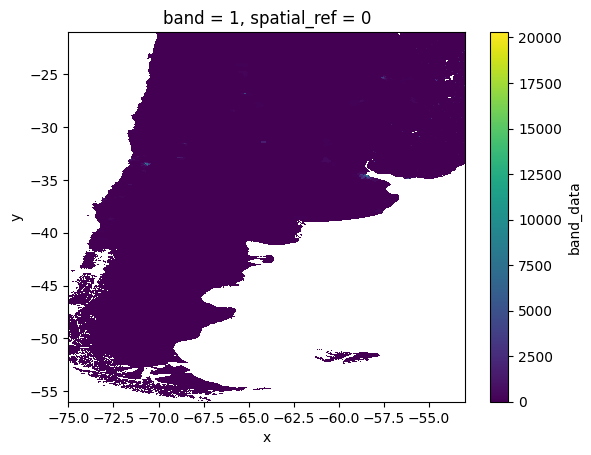

In [8]:
import xarray as xr

ds = xr.open_dataset(r"E:\client_v2_data\gpw_v4_population_count_rev11_2005_30_sec.tif")

# Filter argentina bounds
ds = ds.sel(x=slice(-75, -53), y=slice(-21, -56))
ds.band_data.plot()

In [98]:
gdf = gpd.read_feather(r"E:\client_v2_data\WB_country_IDs.feather")
gdf.columns = [col.lower() for col in gdf.columns]

path = r"Z:\Laboral\World Bank\CLIENT v2\Data\Data_proc\shocks"
files = os.listdir(path)
files = [f for f in files if f.endswith('.parquet')]

In [15]:
from tqdm import tqdm

dfs = []
for f in tqdm(files):
    df = pd.read_parquet(os.path.join(path, f))
    # Agrego como cols la variable, threshold, year y chunk
    names = utils.parse_filename(f)
    df[list(names.keys())] = list(names.values())
    # Proceso el chunk
    dfs += [utils.process_chunk(df)]

# Concatenate all the dataframes and create the shock variables
df = pd.concat(dfs)
df = df.groupby(["ID", "name", "year"]).sum()
df["area_affected"] = df["cells_affected"] / df["total_cells"]
df["population_affected"] = df["population_affected_n"] / df["total_population"]
df = (df
    .drop(columns=["cells_affected", "total_cells", "population_affected_n", "total_population"])
    .reset_index()
    .fillna(0)
)

# Pivot data: every shock has to be a column
pivot = df.pivot(index=["ID", "year"], columns="name", values=["population_affected", "area_affected"])

# Reindex the two-level columns pivot returns
newcols = []
for cols in sums_pivot.columns:
    newcols += [utils.parse_columns(cols)]
pivot.columns = newcols    
pivot = pivot.reset_index()

# Add the data to the gdf
out_df = gdf.merge(pivot, left_on="id", right_on="ID", validate="1:m", how="outer")
out_df.rename(columns={
    "adm0_code": "adm0",
    "admlast_code": "adm_lst",
    }, inplace=True)
DATA_OUT = "Z:\Laboral\World Bank\CLIENT v2\Data\Data_out"
out_df = out_df[["adm0", "adm_lst", "year", "ID"] + newcols]

# Export to stata every country
for country in out_df.adm0.unique():
    out_df[out_df.adm0 == country].to_stata(os.path.join(DATA_OUT, f"drought_{country}.dta"))


100%|██████████| 30600/30600 [12:01<00:00, 42.44it/s]


Text(0.5, 1.0, 'Area affected')

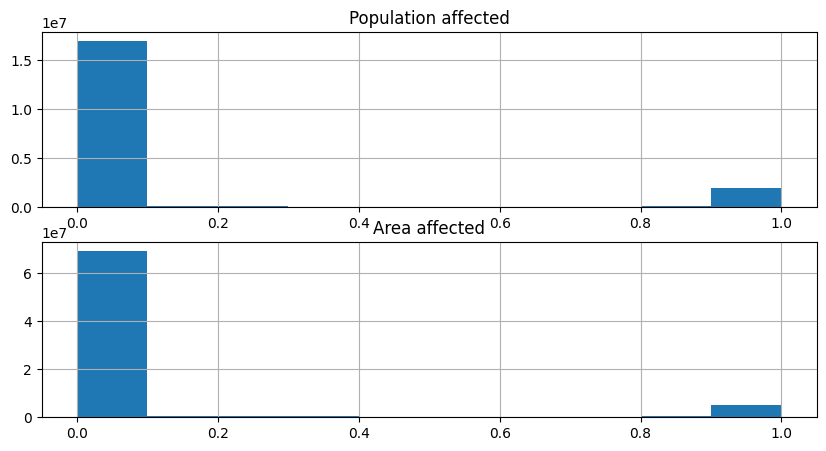

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
df.population_affected.hist(ax=ax[0])
df.area_affected.hist(ax=ax[1])

ax[0].set_title("Population affected")
ax[1].set_title("Area affected")

In [28]:
dfs = []
df = []

In [58]:
import re
def parse_columns(names: tuple):
    agg = names[0]
    string = names[1]
    
    letter = agg[0]
    match = re.match(r"([a-zA-Z]+)(\d+)", string)
    if match:
        return f"{match.group(1)}{letter}{match.group(2)}"
    else:
        raise ValueError("The input string does not match the expected pattern.")

In [103]:
out_df.rename(columns={
    "adm0_code": "adm0",
    "admlast_code": "adm_lst",
    }, inplace=True)

In [110]:
DATA_OUT = "Z:\Laboral\World Bank\CLIENT v2\Data\Data_out"
out_df = out_df[["adm0", "adm_lst", "year", "ID"] + newcols]
for country in out_df.adm0.unique():
    out_df[out_df.adm0 == country].to_stata(os.path.join(DATA_OUT, f"drought_{country}.dta"))


,adm0,adm_lst,year,ID,speip110,speip115,speip120,speip1210,speip1215,speip1220,...,spia2420,spia2425,spia310,spia315,spia320,spia325,spia610,spia615,spia620,spia625
84409,12,4379.0,1970,1659.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84410,12,4379.0,1971,1659.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84411,12,4379.0,1972,1659.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84412,12,4379.0,1973,1659.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84413,12,4379.0,1974,1659.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909421,12,190526.0,2016,37475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1909422,12,190526.0,2017,37475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1909423,12,190526.0,2018,37475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1909424,12,190526.0,2019,37475.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
